In [224]:
#CSC12110 – Phân tích dữ liệu ứng dụng
#ĐỒ ÁN THỰC HÀNH #1
#Nhóm 20CQ.PTDL.09:
#20120257 - Đinh Hoàng Bảo Châu
#20120295 - Ngô Võ Quang Huy
#20120566 - Võ Ngọc Sơn
#20120577 - Huỳnh Quốc Thái

# CSC12110 – Phân tích dữ liệu ứng dụng
# ĐỒ ÁN THỰC HÀNH
## Nhóm 20CQ.PTDL.09:
- 20120257 - Đinh Hoàng Bảo Châu
- 20120295 - Ngô Võ Quang Huy
- 20120566 - Võ Ngọc Sơn
- 20120577 - Huỳnh Quốc Thái

## Quan sát và phân tích tập dữ liệu (EDA)
#### 1. Cho biết kiểu dữ liệu của các thuộc tính

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file Excel
data_train_p1 = pd.read_excel("Data_Train_p1.xlsx")
data_train_p2 = pd.read_excel("Data_Train_p2.xlsx")

# Kết hợp hai data set
merged_data = pd.concat([data_train_p1, data_train_p2])

# 1. Kiểu dữ liệu của các thuộc tính
print("1. Kiểu dữ liệu của các thuộc tính:")
print(merged_data.dtypes)

1. Kiểu dữ liệu của các thuộc tính:
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object


#### 2. Đối với cột Price, cho biết:
- Giá cao nhất, thấp nhất, giá trung bình, mức giá xuất hiện nhiều
- Độ lệch chuẩn của cột price?
- Cho biết giá phân phối xung quanh trung tâm hay cách xa trung tâm? Nhận xét về giá trị mean và median của tập dữ liệu.
- Vẽ đồ thị histogram để nhận xét dữ liệu có bị lệch không?


2. Thống kê về cột Price:
   - Giá cao nhất: 79512
   - Giá thấp nhất: 1759
   - Giá trung bình: 9087.545582178958
   - Mức giá xuất hiện nhiều: 10262
   - Độ lệch chuẩn của cột Price: 4611.411872913706
   - Phân phối giá xung quanh trung tâm hay cách xa trung tâm?
     - Dữ liệu phân phối cách xa trung tâm.


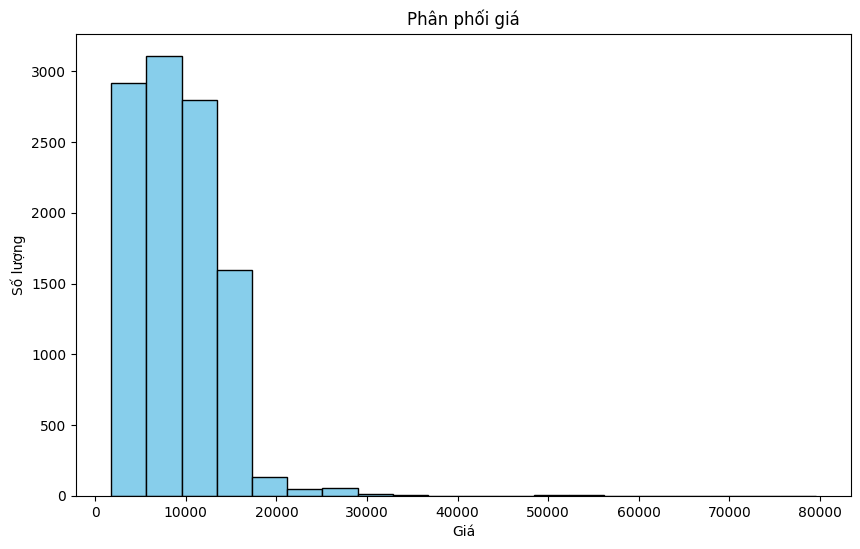

In [226]:
# 2. Thống kê về cột Price
print("\n2. Thống kê về cột Price:")
print("   - Giá cao nhất:", merged_data['Price'].max())
print("   - Giá thấp nhất:", merged_data['Price'].min())
print("   - Giá trung bình:", merged_data['Price'].mean())
print("   - Mức giá xuất hiện nhiều:", merged_data['Price'].mode()[0])
print("   - Độ lệch chuẩn của cột Price:", merged_data['Price'].std())
print("   - Phân phối giá xung quanh trung tâm hay cách xa trung tâm?")
if merged_data['Price'].mean() > merged_data['Price'].median():
    print("     - Dữ liệu phân phối cách xa trung tâm.")
else:
    print("     - Dữ liệu phân phối xung quanh trung tâm.")

# Vẽ đồ thị histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_data['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Phân phối giá')
plt.xlabel('Giá')
plt.ylabel('Số lượng')
plt.show()

#### 3. Mô tả số lượng missing value của mỗi thuộc tính

In [227]:
# 3. Mô tả số lượng missing value
print("\n3. Số lượng missing value của mỗi thuộc tính:")
print(merged_data.isnull().sum())


3. Số lượng missing value của mỗi thuộc tính:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


#### 4. Tính tỷ lệ % missing value của mỗi thuộc tính

In [228]:
print("\n4. Tỷ lệ % missing value của mỗi thuộc tính:")
print((merged_data.isnull().sum() / len(merged_data)) * 100)


4. Tỷ lệ % missing value của mỗi thuộc tính:
Airline            0.00000
Date_of_Journey    0.00000
Source             0.00000
Destination        0.00000
Route              0.00936
Dep_Time           0.00000
Arrival_Time       0.00000
Duration           0.00000
Total_Stops        0.00936
Additional_Info    0.00000
Price              0.00000
dtype: float64


#### 5. Xử lý dữ liệu missing

#### 6. Outlier: sử dụng đồ thị boxplot để quan sát cột Price có tồn tại outlier không?

#### 7. Chuẩn hóa dữ liệu

In [234]:
merged_data["Date_of_Journey"]=pd.to_datetime(merged_data['Date_of_Journey'], dayfirst=True)
merged_data["Dep_Time"]=pd.to_datetime(merged_data['Dep_Time'])
merged_data["Arrival_Time"]=pd.to_datetime(merged_data['Arrival_Time'])

merged_data["Airline"] = merged_data["Airline"].str.replace("Vistara Premium economy","Vistara")
merged_data["Airline"] = merged_data["Airline"].str.replace("Jet Airways Business","Jet Airways")
merged_data["Airline"] = merged_data["Airline"].str.replace("Multiple carriers Premium economy","Multiple Carriers")

merged_data["Destination"] = merged_data["Destination"].replace("New Delhi","Delhi")

merged_data["Total_Stops"] = merged_data["Total_Stops"].map({"non-stop":0,"2 stops":2,"1 stop":1,"3 stops":3,"4 stops":4})

merged_data["month_of_Journey"] = merged_data["Date_of_Journey"].dt.month


## Visualize dữ liệu dạng bảng hoặc đồ thị: 
#### 1. Giá vé tăng khi nào?

#### 2. So sánh tỷ lệ các chuyến bay thẳng và trung chuyển (có dừng)

#### 3. Thành phố nào có lượng chuyến bay đến/đi nhiều nhất?
- Thành phố có số chuyến bay đi nhiều nhất

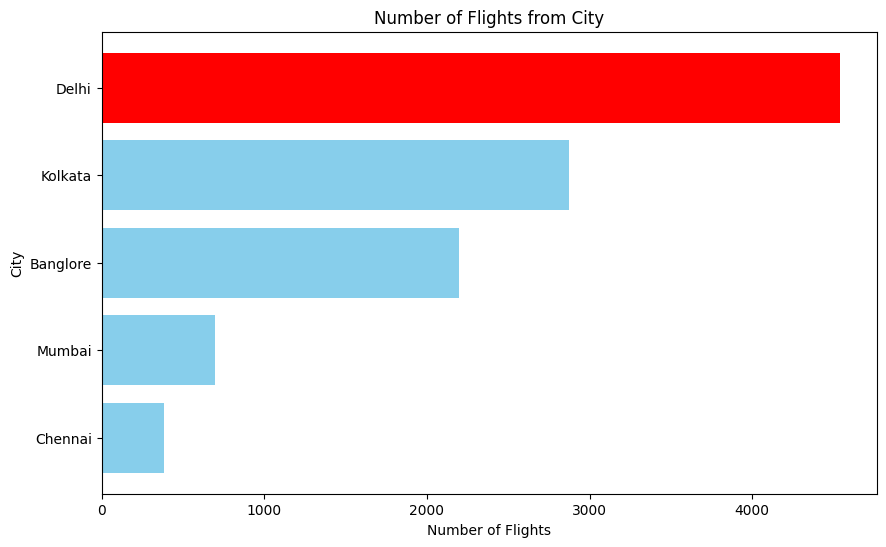

Thành phố có số chuyến bay đi nhiều nhất là Delhi


In [230]:
#Tính số chuyến bay theo nguồn và sắp xếp tăng dần
source_value_count = merged_data['Source'].value_counts().sort_values()
#Lấy index của nguồn có số chuyến bay nhiều nhất
n = len(source_value_count) - 1
#Vẽ barchart
plt.figure(figsize=(10, 6))
plt.barh(source_value_count.index, source_value_count, color='skyblue')
plt.barh(n, source_value_count.iloc[n], color='red')

plt.xlabel('Number of Flights')
plt.ylabel('City')
plt.title('Number of Flights from City')
plt.show()

print(f'Thành phố có số chuyến bay đi nhiều nhất là {source_value_count.index[n]}')

- Thành phố có số chuyến bay đến nhiều nhất

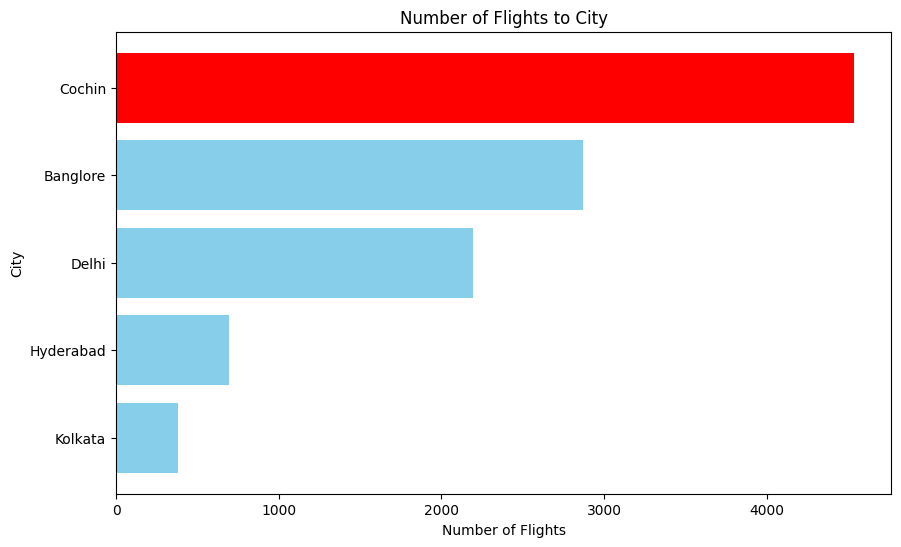

Thành phố có số chuyến bay đến nhiều nhất là Cochin


In [231]:
#Tính số chuyến bay theo đích và sắp xếp tăng dần
destination_value_count = merged_data['Destination'].value_counts().sort_values()

#Lấy index của nguồn có số chuyến bay nhiều nhất
n = len(destination_value_count) - 1

#Vẽ barchart
plt.figure(figsize=(10, 6))
plt.barh(destination_value_count.index, destination_value_count, color='skyblue')
plt.barh(n, destination_value_count.iloc[n], color='red')

plt.xlabel('Number of Flights')
plt.ylabel('City')
plt.title('Number of Flights to City')
plt.show()

print(f'Thành phố có số chuyến bay đến nhiều nhất là {destination_value_count.index[n]}')

#### 4. Hãng máy bay nào có số chuyến bay nhiều/thấp nhất?

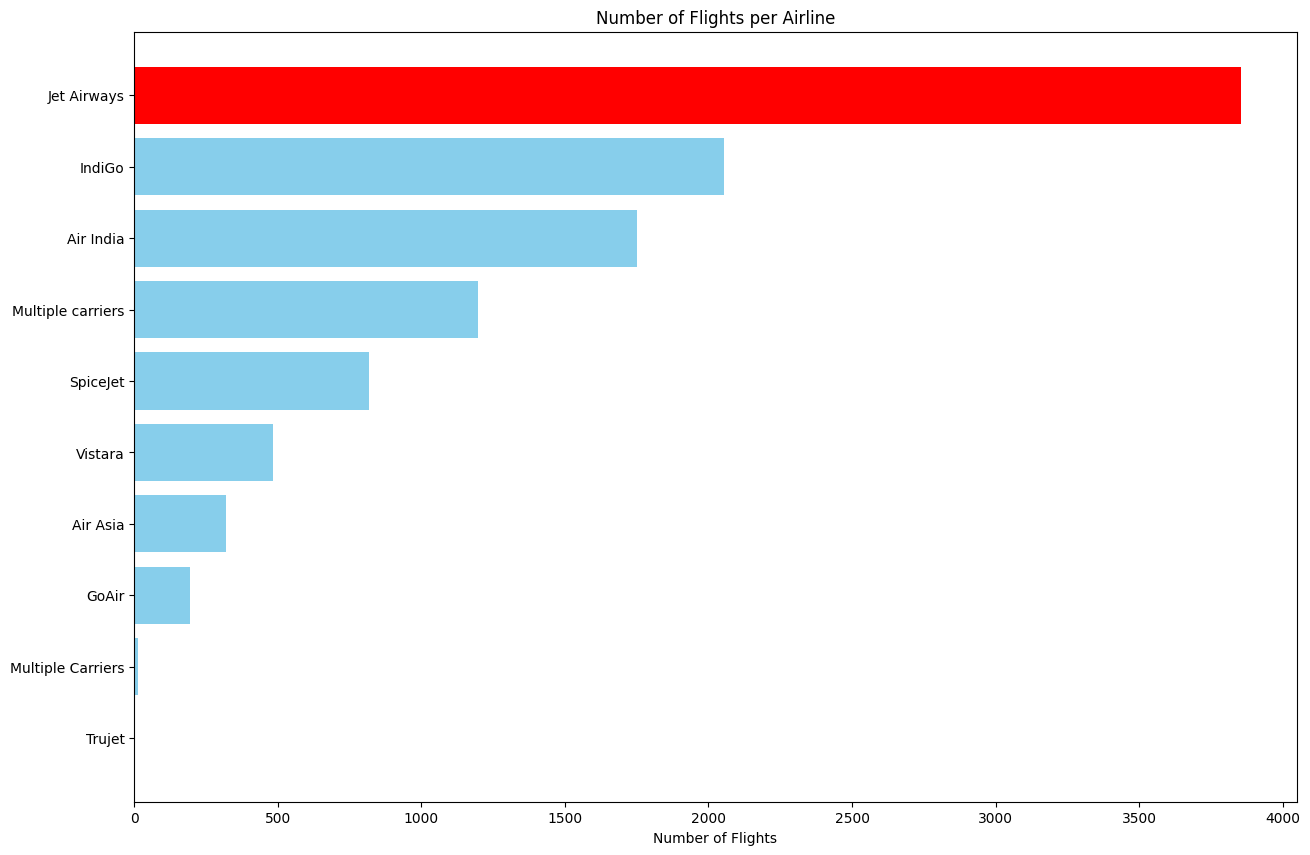

Thành phố có số chuyến bay đến thấp nhất là Trujet
Thành phố có số chuyến bay đến nhiều nhất là Jet Airways


In [232]:
#Tính số chuyến bay theo hãng máy bay và sắp xếp tăng dần
airline_value_count = merged_data['Airline'].value_counts().sort_values()
#Lấy index của nguồn có số chuyến bay nhiều nhất
n = len(airline_value_count) - 1

#Vẽ barchart
plt.figure(figsize=(15, 10))
plt.barh(airline_value_count.index, airline_value_count, color='skyblue')
plt.barh(0, airline_value_count.iloc[0], color='red')
plt.barh(n, airline_value_count.iloc[n], color='red')
plt.xlabel('Number of Flights')
# plt.ylabel('Airline')
plt.title('Number of Flights per Airline')
plt.show()

print(f'Thành phố có số chuyến bay đến thấp nhất là {airline_value_count.index[0]}')
print(f'Thành phố có số chuyến bay đến nhiều nhất là {airline_value_count.index[n]}')

#### 5. Tháng nào là tháng cao điểm

In [249]:
flights_count_by_month = merged_data['month_of_Journey'].value_counts()
#Lấy index của nguồn có số chuyến bay nhiều nhất
n = flights_count_by_month.idxmax()
print(flights_count_by_month.index)
print(n)

Index([5, 6, 3, 4], dtype='int32', name='month_of_Journey')
5


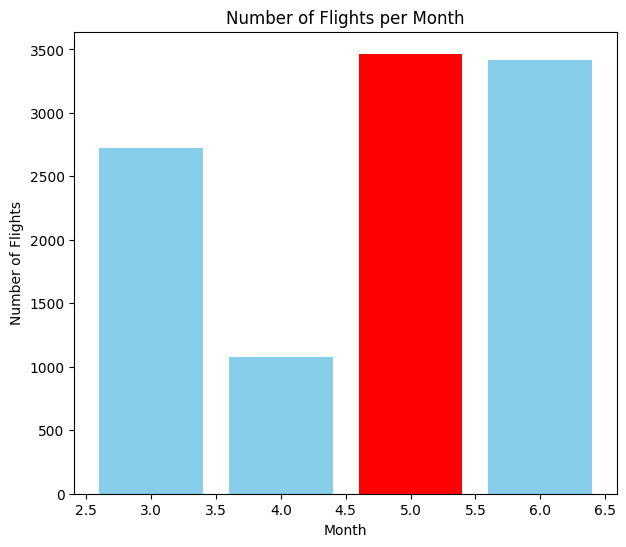

Tháng cao điểm là tháng 5


In [261]:
#Tính số chuyến bay theo tháng và sắp xếp tăng dần
flights_count_by_month = merged_data['month_of_Journey'].value_counts()
#Lấy index của nguồn có số chuyến bay nhiều nhất
n = flights_count_by_month.idxmax()

#Vẽ barchart
plt.figure(figsize=(7, 6))
plt.bar(flights_count_by_month.index, flights_count_by_month, color='skyblue')
plt.bar(n, flights_count_by_month[n], color='red')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Month')
plt.show()


print(f'Tháng cao điểm là tháng {n}')

#### 6. Giá có thay đổi tùy theo hãng hàng không hay không?

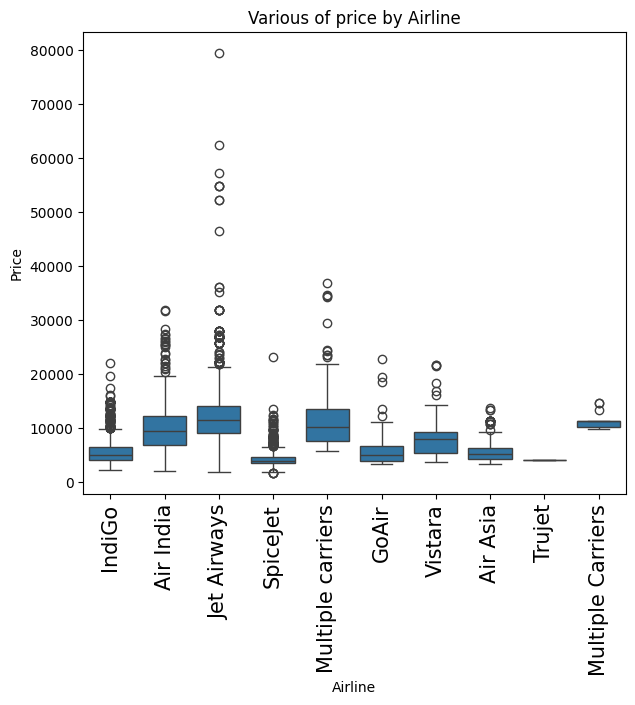

In [266]:
plt.figure(figsize=(7,6))
sns.boxplot(x="Airline",y="Price",data=merged_data)
plt.xticks(rotation=90,size=15)
plt.title("Various of price by Airline")
plt.show()

#### Giá thay đổi tùy theo hãng hàng không

#### 7. Giá vé bị ảnh hưởng như thế nào khi mua vé chỉ 1 hoặc 2 ngày trước ngày khởi hành?

#### 8. Giá vé có thay đổi theo thời gian đi và đến không?

#### 9. Giá thay đổi như thế nào khi thay đổi Nguồn và Điểm đến?

### Kết luận các điểm chính quan sát được từ dữ liệu từ các gợi ý trên

### Ngoài các đặc trưng trong tập dữ liệu, các yếu tố nào có khả năng ảnh hưởng đến giá vé chuyến bay?

### Dự đoán giá vé